In [ ]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intro to Veo 2 Video Generation

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/veo/intro_veo.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fveo%2Fintro_veo.ipynb">
      <img width="32px" src="https://cloud.google.com/ml-engine/images/colab-enterprise-logo-32px.png" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/veo/intro_veo.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/veo/intro_veo.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/veo/intro_veo.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/veo/intro_veo.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/veo/intro_veo.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/53/X_logo_2023_original.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/veo/intro_veo.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/veo/intro_veo.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| | |
|-|-|
| Author(s) | [Dave Wang](https://github.com/wadave/) |

## Overview

### Veo 2

Vertex AI now offers [Veo 2](https://blog.google/technology/google-labs/video-image-generation-update-december-2024/), Google's cutting-edge video generation technology, empowering developers to create stunningly detailed videos.  Veo 2 simulates real-world physics and supports a diverse range of visual styles.

This tutorial demonstrates how to use the REST API to generate videos from both text prompts and input images.

Veo 2 is currently in private preview. you can sign up for early access via [VideoFX](https://labs.google/fx/tools/video-fx). 


## Get started

### Install libraries

In [ ]:
%pip install -q --upgrade google-genai

Note: you may need to restart the kernel to use updated packages.


### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Wait until it's finished before continuing to the next step. ⚠️</b>
</div>

### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [43]:
import os

BUCKET_NAME = "[your-bucket-name]"
IMG_PATH = "[your-image-path]"
LOCATION = "us-central1"
MODEL_ID = "veo-2.0-generate-exp"  # This is model id for veo 2
PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

### Import libraries

In [ ]:
import base64
import json
import mimetypes
import os
import pprint
import time

from IPython.display import HTML, Image, display
from google import genai
import google.auth
import google.auth.transport.requests
from google.cloud import storage
from google.genai import types
import requests

### Set up endpoint parameters

In [21]:
video_model = f"https://us-central1-aiplatform.googleapis.com/v1beta1/projects/{PROJECT_ID}/locations/us-central1/publishers/google/models/{MODEL_ID}"
prediction_endpoint = f"{video_model}:predictLongRunning"
fetch_endpoint = f"{video_model}:fetchPredictOperation"

### Define helper functions

In [3]:
def send_request_to_google_api(api_endpoint, data=None):
    """Sends an HTTP request to a Google API endpoint.

    Args:
        api_endpoint: The URL of the Google API endpoint.
        data: (Optional) Dictionary of data to send in the request body.

    Returns:
        The response from the Google API as a JSON object, or None if an error occurs.
        Raises an exception for bad status codes.
    """
    try:
        creds, _ = google.auth.default()  # _ is often used for variables we don't need
        auth_req = google.auth.transport.requests.Request()
        creds.refresh(auth_req)
        access_token = creds.token

        headers = {
            "Authorization": f"Bearer {access_token}",
            "Content-Type": "application/json",
        }

        response = requests.post(api_endpoint, headers=headers, json=data)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        return response.json()
    except requests.exceptions.RequestException as e:  # Catch potential request errors
        print(f"Error sending request: {e}")  # Handle or log the error appropriately
        return None  # Or re-raise the exception if you want the caller to handle it


def compose_video_gen_request(
    prompt,
    image_uri,
    gcs_uri,
    seed,
    aspect_ratio,
    sample_count,
    negative_prompt,
    person_generation="allow_adult",
):
    """Composes the request body for the video generation API.
    Args:
        prompt: The text prompt describing the desired video.
        image_uri: The GCS URI of the initial image (optional).  If provided,
            it should point to a PNG image.
        gcs_uri: The GCS URI where the generated video(s) will be stored.
        seed: A random seed for video generation reproducibility.
        aspect_ratio: The desired aspect ratio of the generated video (e.g., "16:9", "9:16", "square").
        sample_count: The number of videos to generate.
        negative_prompt: A text prompt describing what to avoid in the generated video.
        person_generation: Controls the generation of people in the video.
            Defaults to "allow_adult". Other possible values might include
            "disallow", "allow_child", etc. (check the API documentation for
            all valid values).

    Returns:
        A dictionary representing the request body for the video generation API.
    """

    instance = {"prompt": prompt}
    if image_uri:
        instance["image"] = {"gcsUri": image_uri, "mimeType": "png"}

    request = {
        "instances": [instance],
        "parameters": {
            "storageUri": gcs_uri,
            "sampleCount": sample_count,
            "seed": seed,
            "aspectRatio": aspect_ratio,
            "negativePrompt": negative_prompt,
            "personGeneration": person_generation,
        },
    }
    return request


def fetch_operation(lro_name, timeout_seconds=300, poll_interval_seconds=10):
    """Fetches the status of a Long-Running Operation (LRO).

    Args:
        lro_name: The name of the LRO.
        timeout_seconds: The maximum time to wait for the operation to complete.
        poll_interval_seconds: The time to wait between polls.

    Returns:
        The LRO response if successful, None if it times out, or raises an exception for API errors.
    """
    request = {"operationName": lro_name}
    end_time = time.time() + timeout_seconds

    while time.time() < end_time:
        resp = send_request_to_google_api(fetch_endpoint, request)
        if resp is None:  # Handle API errors during polling.
            return None  # or raise the exception if you prefer.
        if "done" in resp and resp["done"]:
            return resp
        time.sleep(poll_interval_seconds)

    print(
        f"LRO {lro_name} timed out after {timeout_seconds} seconds."
    )  # Informative message
    return None  # Indicate timeout


def text_to_video(
    prompt, seed, aspect_ratio, sample_count, output_gcs, negative_prompt=""
):
    """Generates videos from a text prompt using the Google Cloud Video Generation API.

    Args:
        prompt: The text prompt describing the desired video.
        seed: A random seed for video generation reproducibility.
        aspect_ratio: The desired aspect ratio of the generated video (e.g., "16:9", "9:16", "square").
        sample_count: The number of videos to generate.
        output_gcs: The GCS URI where the generated video(s) will be stored.
        negative_prompt: A text prompt describing what to avoid in the generated video (optional).

    Returns:
        The LRO (Long-Running Operation) response from the API, which can be used
        to track the video generation progress. Returns None if the initial API
        request fails.
    """
    req = compose_video_gen_request(
        prompt, None, output_gcs, seed, aspect_ratio, sample_count, negative_prompt
    )
    resp = send_request_to_google_api(prediction_endpoint, req)
    if resp is None:  # Handle API errors during initial request.
        return None
    print(resp)
    return fetch_operation(resp["name"])


def image_to_video(
    prompt, image_gcs, seed, aspect_ratio, sample_count, output_gcs, negative_prompt=""
):
    """Generates videos from an image and a text prompt using the Google Cloud Video Generation API.

    Args:
        prompt: The text prompt describing the desired video.
        image_gcs: The GCS URI of the input image.
        seed: A random seed for video generation reproducibility.
        aspect_ratio: The desired aspect ratio of the generated video (e.g., "16:9", "9:16", "square").
        sample_count: The number of videos to generate.
        output_gcs: The GCS URI where the generated video(s) will be stored.
        negative_prompt: A text prompt describing what to avoid in the generated video (optional).

    Returns:
        The LRO (Long-Running Operation) response from the API, which can be used
        to track the video generation progress. Returns None if the initial API
        request fails.
    """
    req = compose_video_gen_request(
        prompt, image_gcs, output_gcs, seed, aspect_ratio, sample_count, negative_prompt
    )
    resp = send_request_to_google_api(prediction_endpoint, req)
    if resp is None:  # Handle API errors during initial request.
        return None
    print(resp)
    return fetch_operation(resp["name"])

In [7]:
def play_video(op, bucket_name=None):
    """Displays generated videos from an LRO response using HTML5 video tag.

    Args:
        op: The LRO response dictionary.
        bucket_name: The GCS bucket name (optional, auto-detected if None).
    """

    if op and op.get("response") and op["response"].get("generatedSamples"):
        storage_client = storage.Client()

        for video in op["response"]["generatedSamples"]:
            gcs_uri = video["video"]["uri"]
            parts = gcs_uri.replace("gs://", "").split("/")
            if bucket_name is None:
                bucket_name = parts[0]
                blob_name = "/".join(parts[1:])
            else:
                blob_name = "/".join(parts[1:])

            bucket = storage_client.bucket(bucket_name)
            blob = bucket.blob(blob_name)

            file_name = blob_name.split("/")[-1]
            local_filepath = file_name

            try:
                blob.download_to_filename(local_filepath)
                print(f"Downloaded {gcs_uri} to {local_filepath}")

                mime_type, _ = mimetypes.guess_type(local_filepath)
                if mime_type and mime_type.startswith(
                    "video/"
                ):  # Check if it's a video
                    with open(local_filepath, "rb") as f:
                        video_bytes = f.read()
                    video_base64 = base64.b64encode(video_bytes).decode("utf-8")

                    video_html = f"""
                    <video width="640" height="480" controls>
                        <source src="data:{mime_type};base64,{video_base64}" type="{mime_type}">
                        Your browser does not support the video tag.
                    </video>
                    """
                    display(HTML(video_html))  # Use display() for Jupyter

                else:
                    print(f"File {local_filepath} is not a supported video format.")

                os.remove(local_filepath)
                print(f"Deleted local file: {local_filepath}")

            except Exception as e:
                print(f"Error processing {gcs_uri}: {e}")
                if os.path.exists(local_filepath):
                    os.remove(local_filepath)
                    print(f"Deleted partially downloaded local file: {local_filepath}")

    else:
        print("No videos to display in the LRO response.")

In [39]:
def display_image_from_gcs_local(
    bucket_name, blob_name, local_filepath="temp_image.jpg"
):  # Added default local path
    """Downloads an image from GCS, saves it locally, and displays it.

    Args:
        bucket_name: The name of the GCS bucket.
        blob_name: The name of the blob (file) in the bucket.
        local_filepath: path to save image locally before display.
    """
    try:
        storage_client = storage.Client()
        bucket = storage_client.bucket(bucket_name)
        blob = bucket.blob(blob_name)

        blob.download_to_filename(local_filepath)  # Download to local file
        display(Image(local_filepath, width=800, height=600))  # Display from local file
        os.remove(local_filepath)  # Clean up the local file
        print(f"Removed local file: {local_filepath}")

    except Exception as e:
        print(f"Error displaying image: {e}")
        if os.path.exists(local_filepath):
            os.remove(local_filepath)
            print(f"Removed partially downloaded local file: {local_filepath}")

##  1. Create Veo 2 Prompt (optional)

This step is optional. If you have a satisfactory prompt, please go to step 2 directly.

In [14]:
def create_veo_prompt(user_intent):
    client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)
    # model = "gemini-2.0-flash-exp"
    # model = "gemini-1.5-pro-002"
    model = "gemini-exp-1206"
    prompt = f"""
     Generate a high quality rewrite of user_intent for a text-to-video service. It adds details , but deos not change the user's intent.

     Consider extra details to enhance creativity. Consider adding visual details IF it would support the user query:
     - camera angle and composition: wide angle, drone camera, low angle view, closeup, macro, view from below looking up, centered, fisheye
     - lighting: silhouette, backlit, dim ambient lighting, long shadows, natural light, sunrise / sunset, daylight
     - camera settings and motion: depth of field, in focus, long exposure, tracking shot, POV
     - general quality identifiers: professional, award winning, high-quality
     - styles: cinematic shot, street photography, fashion photography, architectural photography, dramatic, vintage, retro
     - background: blurred background, bokeh, pink background, solid light blue background
     - color scheme: high contrast, cold muted tones, muted orange warm tones, dark tones, pastel colors
     - subject actions: walking, running, ski, snowboarding, turning head
     - subject poses: rotation, flip, inversions
     
     To get the most out of Veo, incorporate specific video terminology into your prompts. Veo understands a wide range of terms related to:

     Shot composition: Specify the framing and number of subjects in the shot (e.g., "single shot," "two shot," "over-the-shoulder shot").
     Camera positioning and movement: Control the camera's location and movement using terms like "eye level," "high angle," "worms eye," "dolly shot," "zoom shot," "pan shot," and "tracking shot."
     Focus and lens effects: Use terms like "shallow focus," "deep focus," "soft focus," "macro lens," and "wide-angle lens" to achieve specific visual effects.
     Overall style and subject: Guide Veo's creative direction by specifying styles like "sci-fi," "romantic comedy," "action movie," or "animation." You can also describe the subjects and backgrounds you want, such as "cityscape," "nature," "vehicles," or "animals."


     Now, provide 4 different REWRITES for the following user_intent in the style above using about 100 words each. Only produce the final four rewrites, one on each line, no intermediate thoughts. The rewrites should be distinct from each other, while following the user's intent.
     Here's user_intent: {user_intent}

     * **Output Format:** Return your analysis as a JSON object with the following structure:
       'prompt1': 'Text prompt for the first rewrite',
       'prompt2': 'Text prompt for the second rewrite',

     """

    contents = [prompt]

    generate_content_config = types.GenerateContentConfig(
        temperature=1,
        top_p=0.95,
        max_output_tokens=8192,
        response_modalities=["TEXT"],
        response_mime_type="application/json",
        # response_schema=response_schema,
        safety_settings=[
            types.SafetySetting(category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
            types.SafetySetting(
                category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"
            ),
            types.SafetySetting(
                category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"
            ),
            types.SafetySetting(category="HARM_CATEGORY_HARASSMENT", threshold="OFF"),
        ],
    )

    response = client.models.generate_content(
        model=model,
        contents=contents,
        config=generate_content_config,
    )

    return response.text

In [15]:
user_intent = """An xgames snowboarder performs superpipe snowboarding Frontside 1080 trick at X Games Aspen. The snowboarder initiates a jump while facing downhill, then rotates their body and board a full three rotations (1080 degrees) in the air,
 at X Games Aspen"""

In [16]:
resp = create_veo_prompt(user_intent)

In [17]:
pprint.pprint(json.loads(resp))

{'prompt1': 'A cinematic shot with a shallow focus and depth of field, '
            'featuring an X Games snowboarder performing a Frontside 1080 '
            'trick at X Games Aspen. The snowboarder initiates a jump while '
            'facing downhill, then rotates their body and board a full three '
            'rotations (1080 degrees) in the air, with a blurred background. '
            'The lighting is natural, with long shadows, and the overall style '
            'is high-quality, award-winning. The color scheme is high '
            'contrast, with cold muted tones.',
 'prompt2': 'A high-angle tracking shot with a wide-angle lens, capturing an X '
            'Games snowboarder in action. The snowboarder executes a Frontside '
            '1080 trick at X Games Aspen. The athlete initiates a jump while '
            'facing downhill, then rotates their body and board a full three '
            'rotations (1080 degrees) mid-air. The shot is in focus with dim '
            'am

In [18]:
prompt = json.loads(resp)["prompt2"]
prompt

'A high-angle tracking shot with a wide-angle lens, capturing an X Games snowboarder in action. The snowboarder executes a Frontside 1080 trick at X Games Aspen. The athlete initiates a jump while facing downhill, then rotates their body and board a full three rotations (1080 degrees) mid-air. The shot is in focus with dim ambient lighting, creating a dramatic effect. The background is a cityscape of Aspen, with a solid light blue sky. The overall style is professional, with a vintage, retro feel.'

# 2. Create videos using Veo 2 REST API

In [42]:
prompt = """
A high-angle tracking shot with a wide-angle lens, capturing an X Games snowboarder in action. 
The snowboarder executes a Frontside 1080 trick at X Games Aspen. The athlete initiates a jump while facing downhill, 
then rotates their body and board a full three rotations (1080 degrees) mid-air. 
The shot is in focus with dim ambient lighting, creating a dramatic effect. 
The background is a cityscape of Aspen, with a solid light blue sky. 
The overall style is professional, with a vintage, retro feel.
"""

### 2.1 Generate video from a text prompt

In [19]:
aspect_ratio = "16:9"  # @param ["16:9", "9:16"]
output_gcs = f"gs://{BUCKET_NAME}"  # @param {type: 'string'}
negative_prompt = ""  # @param {type: 'string'}
seed = 200
sample_count = 1

ttv = text_to_video(
    prompt, seed, aspect_ratio, sample_count, output_gcs, negative_prompt
)

{'name': 'projects/veo-testing/locations/us-central1/publishers/google/models/veo-2.0-generate-exp/operations/493dcf02-2e07-4028-8a9e-39251f4e2f37'}


In [20]:
play_video(ttv)

Downloaded gs://dw-veo2-testing/16847374300857870847/sample_0.mp4 to sample_0.mp4


Deleted local file: sample_0.mp4


### 2.2 Generate video from an image and text prompt

#### The below image will be used to generate video.

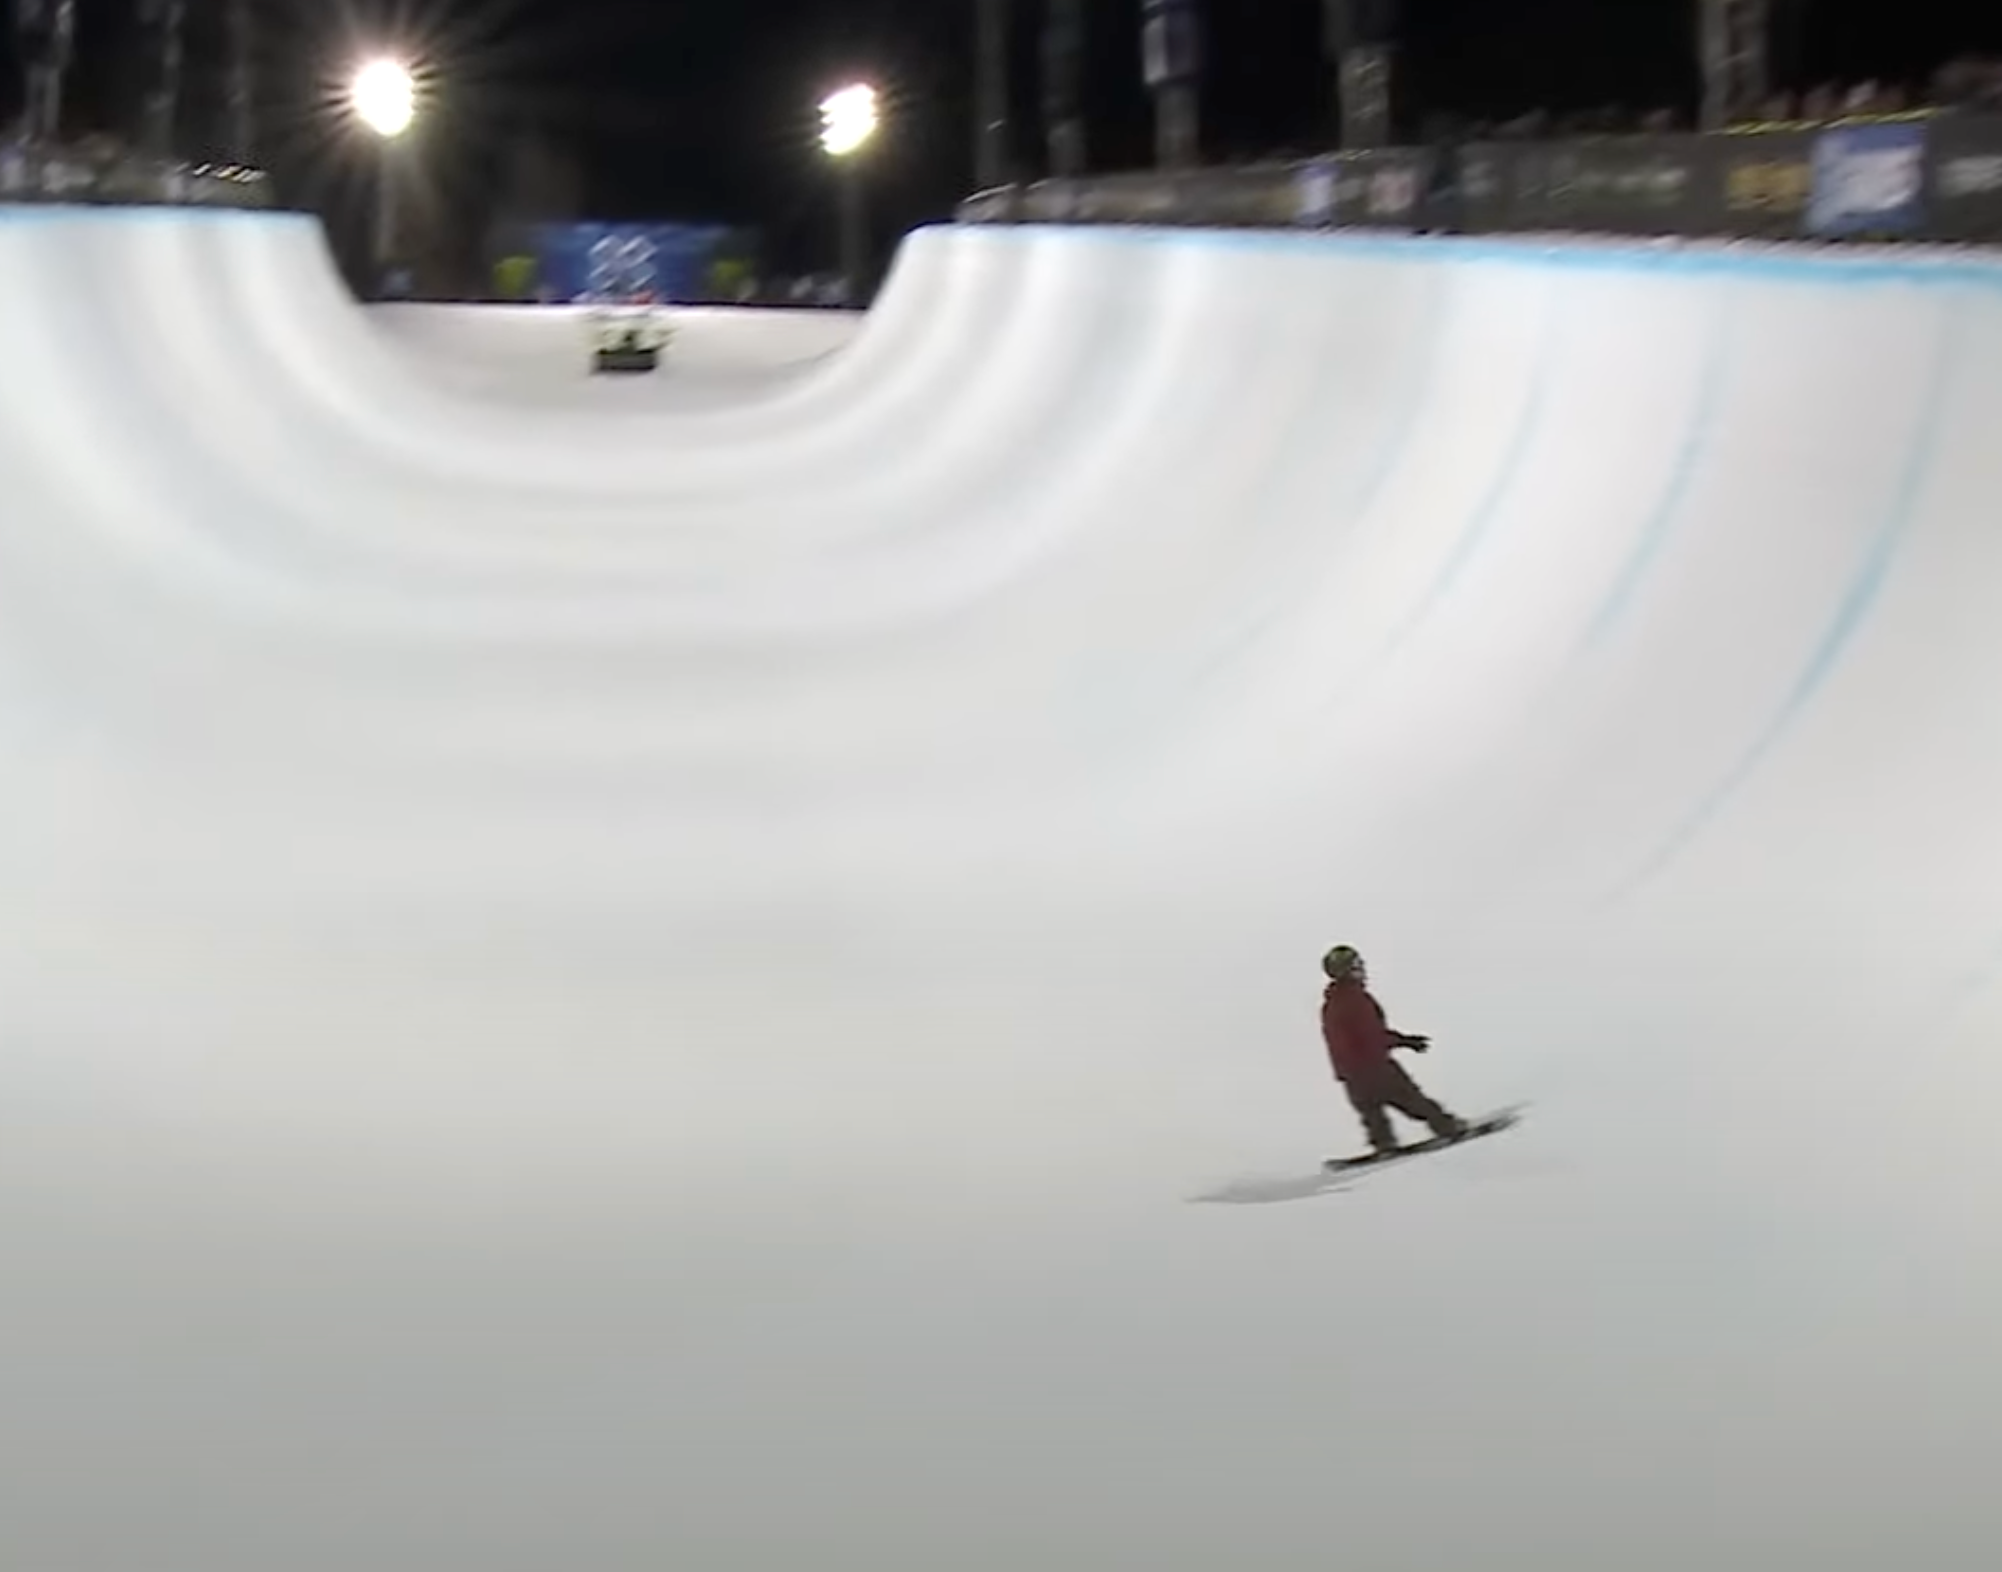

Removed local file: temp_image.jpg


In [ ]:
display_image_from_gcs_local(BUCKET_NAME, IMG_PATH)

In [41]:
image_gcs = f"gs://{BUCKET_NAME}/{IMG_PATH}"  # @param {type: 'string'}
aspect_ratio = "16:9"  # @param ["16:9", "9:16"]
output_gcs = f"gs://{BUCKET_NAME}"  # @param {type: 'string'}
negative_prompt = ""  # @param {type: 'string'}
seed = 200
sample_count = 1

itv = image_to_video(
    prompt, image_gcs, seed, aspect_ratio, sample_count, output_gcs, negative_prompt
)

{'name': 'projects/veo-testing/locations/us-central1/publishers/google/models/veo-2.0-generate-exp/operations/ad836088-35a9-41aa-bd33-3858161b7235'}


In [44]:
play_video(itv)

Downloaded gs://dw-veo2-testing/11612266310777047339/sample_0.mp4 to sample_0.mp4


Deleted local file: sample_0.mp4


# References
1. https://cloud.google.com/vertex-ai/generative-ai/docs/video/generate-videos
2. https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/veo-video-generation